In [154]:
import pandas as pd
import nltk

from ast import literal_eval
# nltk.download('punkt')
# nltk.download('stopwords')

import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Data load


In [115]:
credit_df=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
credit_df.columns = ['id', 'title', 'cast', 'crew']
credit_df.describe()

movie_df=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
movie_df.columns
movie_df.describe()

,id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Useful feature for similar calculation:
* **overview**
* **cast**: contains actor/actress name
* **keywords**: contains keyword name
* **genres**: contains genres in name


### Join and Preprocess
#### 1. Merge
#### 2. Fill na
#### 3. Process json string fields

In [116]:
movie_df = movie_df.merge(credit_df, on='id')
movie_df.columns

movie_df['overview'] = movie_df['overview'].fillna('')
movie_df.sample(1)

for key in ['cast', 'crew', 'keywords', 'genres']:
    movie_df[key] = movie_df[key].apply(literal_eval)
    
movie_df[['id','overview','cast', 'keywords', 'genres']].head(3)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
2119,30000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.tigger.com,15655,"[{""id"": 3905, ""name"": ""owl""}, {""id"": 4144, ""na...",en,The Tigger Movie,"As it happens, everybody - Pooh, Piglet, Eeyor...",9.829859,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Tigger Movie,6.3,143,The Tigger Movie,"[{""cast_id"": 2, ""character"": ""Tigger / Winnie ...","[{""credit_id"": ""59121da0c3a3686519043247"", ""de..."


,id,overview,cast,keywords,genres
0,19995,"In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,285,"Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,206647,A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [117]:
def get_list_name(x):
    if isinstance(x, list):
        names = [i['name'] for i in x if len(i['name'])> 2]
        names = ' '.join(names)
        return names
    return []

for col in ['cast', 'keywords', 'genres']:
    movie_df[col+'_'] = movie_df[col].apply(get_list_name)
    
movie_df[['overview','cast', 'keywords', 'genres','cast_', 'keywords_', 'genres_']].head(3)

,overview,cast,keywords,genres,cast_,keywords_,genres_
0,"In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Sam Worthington Zoe Saldana Sigourney Weaver S...,culture clash future space war space colony so...,Action Adventure Fantasy Science Fiction
1,"Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Johnny Depp Orlando Bloom Keira Knightley Stel...,ocean drug abuse exotic island east india trad...,Adventure Fantasy Action
2,A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Daniel Craig Christoph Waltz Léa Seydoux Ralph...,spy based on novel secret agent sequel mi6 bri...,Action Adventure Crime


### Create soup feature

In [118]:
def create_soup(x):
    return x.overview + x.keywords_ + x.cast_ + x.genres_

movie_df['soup'] = movie_df.apply(create_soup, axis=1)
movie_df.soup.sample(2)

4326    Deep in the heart of Jakarta's slums lies an i...
261     John McClane is back and badder than ever, and...
Name: soup, dtype: object

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
2076,21000000,"[Horror, Thriller, Science Fiction]",NaN,7341,"[suicide, male nudity, female nudity]",en,The Rage: Carrie 2,"After the suicide of her only friend, Rachel h...",4.781538,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Looks Can Kill,The Rage: Carrie 2,5.1,76,The Rage: Carrie 2,"[Emily Bergl, Jason London, Amy Irving]","[{'credit_id': '52fe447ac3a36847f8098781', 'de..."
2062,0,"[Comedy, Drama]",NaN,17795,"[white house, usa president, national security...",en,My Fellow Americans,They used to run the country. Now they're runn...,2.809378,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A comedy about life, liberty and the pursuit o...",My Fellow Americans,6.3,46,My Fellow Americans,"[Jack Lemmon, James Garner, Dan Aykroyd]","[{'credit_id': '52fe47489251416c75093c89', 'de..."
2258,20000000,"[Animation, Fantasy, Science Fiction]",NaN,8953,"[england, inventor, ball]",ja,Steamboy,After receiving a package from his Grandfather...,9.129808,"[{""name"": ""Bandai Visual Company"", ""id"": 528},...",...,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,He will save the future.,Steamboy,6.4,102,Steamboy,"[Anne Suzuki, Masane Tsukayama, Katsuo Nakamura]","[{'credit_id': '52fe44cac3a36847f80aa39f', 'de..."


In [38]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [159]:
def analysis(df2, col):

    print('========== '+col+' =============')
    df2[col] = df2[col].fillna('')
    df2['dummy'] = 1

    text = df2.groupby('dummy')[col].apply(' '.join)

    # overview = nltk.Text(text)
    text = text.iloc[0]
    text = nltk.word_tokenize(text)

    # overview
    print("Number of word: ", len(text))
    stop_words = stopwords.words('english')
    # text = list(filter(lambda x: x not in stopwords.words('english'), text))
    # remove stop words
    text = [w for w in text if not w in stop_words]
    print("After remove stop words: ", len(text))
    text = [w for w in text if not w.lower() in stop_words]
    print("After remove stop words (uncase): ",len(text))

    # remove short words
    short_words = [w for w in text if len(w) <3 ]
    print("Shorts words: ", len(short_words), short_words[:10])

    text = [w for w in text if len(w) >2 ]
    print("After remove Shorts words: ",len(text), text[:10])
    return text

clean_overview = analysis(movie_df, 'overview')
clean_keyword = analysis(movie_df, 'keywords_')
clean_genres = analysis(movie_df, 'genres_')
clean_cast = analysis(movie_df, 'cast_')


========== overview =============
Number of word:  282268
After remove stop words:  182637
After remove stop words (uncase):  175454
Shorts words:  32971 [',', ',', '.', ',', ',', '.', '.', '’', '.', ',']
After remove Shorts words:  142483 ['22nd', 'century', 'paraplegic', 'Marine', 'dispatched', 'moon', 'Pandora', 'unique', 'mission', 'becomes']
========== keywords_ =============
Number of word:  54646
After remove stop words:  52208
After remove stop words (uncase):  52208
Shorts words:  545 ["'s", 'dc', "'s", 'dc', 'dc', 'dc', 'dc', 'dc', '(', ')']
After remove Shorts words:  51663 ['culture', 'clash', 'future', 'space', 'war', 'space', 'colony', 'society', 'space', 'travel']
========== genres_ =============
Number of word:  12703
After remove stop words:  12703
After remove stop words (uncase):  12703
Shorts words:  8 ['TV', 'TV', 'TV', 'TV', 'TV', 'TV', 'TV', 'TV']
After remove Shorts words:  12695 ['Action', 'Adventure', 'Fantasy', 'Science', 'Fiction', 'Adventure', 'Fantasy', 'A

In [157]:
def plot_most_common_sample(text):
    overview = nltk.Text(text)
    # overview.dispersion_plot(text)
    # sorted(set(overview))
    fdist1 = nltk.FreqDist(overview)
    fdist1.most_common(10)
    most_commons = list(map(lambda x: x[0], fdist1.most_common(30)))

    text2 = [w for w in text if w in most_commons]
#     print(len(text2))
    # text
    # b = nltk.Text(a)
    fdist2 = nltk.FreqDist(text2)
    return fdist2.plot()

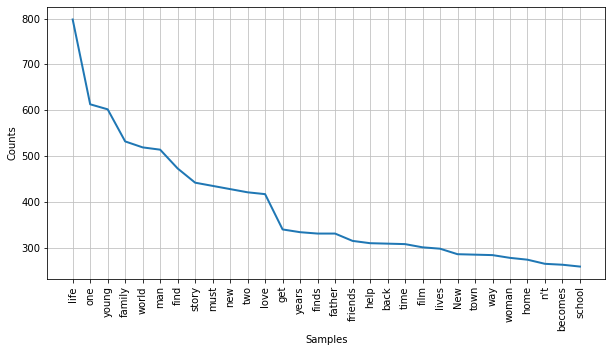

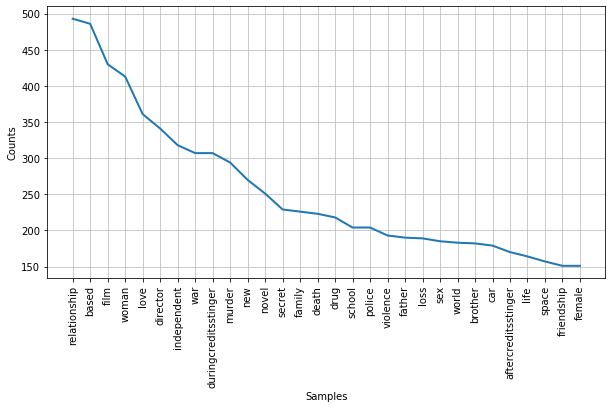

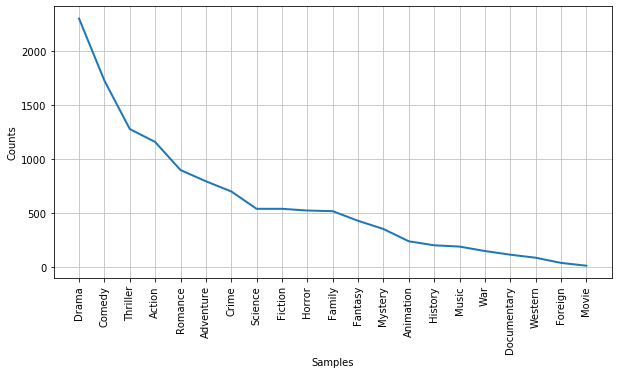

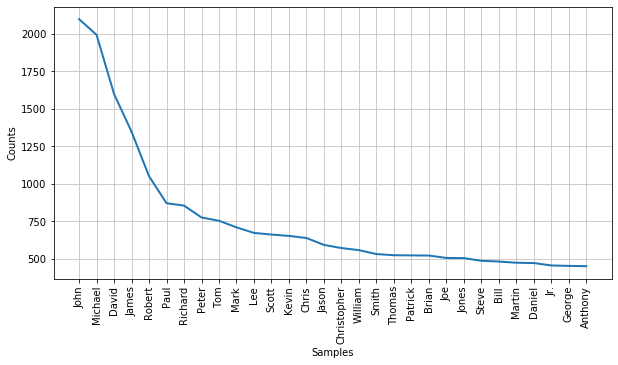

In [160]:
# clean_genres
plot_most_common_sample(clean_overview)
plot_most_common_sample(clean_keyword)
plot_most_common_sample(clean_genres)
plot_most_common_sample(clean_cast)


## TF-IDF
* TF - Term Frequency: = term instances / total instances
* IDF - Inverse Document Frequency = log(number of doc / number of documents have term)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(stop_words='english')
tv = TfidfVectorizer(stop_words='english')

a = "cat hat bat splat cat bat hat mat cat"
b = "cat mat cat sat"

In [5]:
cv_score = cv.fit_transform([a, b])
cv_score

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

def cal_tfidf_matrix(df2):
    #Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
    tfidf = TfidfVectorizer(stop_words='english')

    #Replace NaN with an empty string
    df2['overview'] = df2['overview'].fillna('')

    #Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix = tfidf.fit_transform(df2['overview'])

    tfidf_matrix.shape
    return tfidf_matrix

cal_tfidf_matrix(df21)

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>